# Numpy.Random

## Introduction

This Jupyter Notebook will briefly introduce the Numpy Python package, before going more in depth into its Random module. I'll be looking at when and why one would use Numpy.Random, and how it generates its "pseudorandom" numbers. I'll then detail the various types of output the module can provide and some of their use cases. Finally I will be going through six probability distributions, five of which have specific functions in Numpy.Random, and using hypothetical examples to discuss why and when one would use them.

Throughout this Jupyter Notebook I will be using Numpy 1.19 as the changes to its pseudorandom number generation have implications on the syntax and results of many of the functions available.

The content of this Jupyter Notebook was written by Brian Doheny. This is my submission for the Programming for Data Analysis 2020 module at the Galway-Mayo Institute of Technology (GMIT).

For more details on how to download and run this Jupyter Notebook, please see the README file in this repository.
_____

# Contents

#### Introduction to Numpy
* [What is Numpy](#numpy)
* [Arrays](#arrays)

#### Introduction to Numpy.Random and pseudorandom numbers
* [Numpy.Random](#numpy_random)
* [Pseudorandom use cases](#pseudorandom_uses)
* [Pseudorandom Generators](#pseudorandom_generators)
* [Why move from Mersenne Twister (MT19937) to Permuted Congruential Generator (PCG64)?](#pcg64)
* [Seeds](#seeds)

#### Numpy.Random pseudorandom number generator functions
* [Numpy.Random Generator Functions](#functions)
* [Simple Random Data](#simple_random)
* [Permutations](#permutations)

#### Probability Distributions in Numpy.Random
* [Distributions](#distributions)
* [Discrete Vs Continuous data](#discrete_cont)
* [Normal/Gaussian Distribution](#normal)
* [Uniform Distribution](#uniform)
* [Bernoulli and Binomial Distributions](#binomial)
* [Geometric and Negative Binomial Distributions](#geometric)

#### References
* [References and sources](#references)


<a id='numpy'></a> 
# What is Numpy?

Numpy is a Python package that is focused around mathematical functions and related use cases in Python. It introduces  N-Dimensional Arrays (ndarray) to Python, which can store large amounts of data of the same data type (e.g. string, integer, float), and allows the data to be stored in various "shapes" (i.e. different dimensions). Alongside the ndarray data type, NumPy is heralded for its speed and ease of use, especially across larger and larger data sets.[1] 

Numpy is not the only package that brings arrays to Python, nor was it even the first, as it replaced Numarray and Numeric, however it is the most widely adopted of these packages. The package is so popular, it now forms the foundation of other popular data science packages and datatypes, such as the Pandas DataFrame[2], and has thus further cemented itself into the Python data science ecosystem.

<a id='arrays'></a> 
## Arrays

Arrays are a list-like data type, although they can only store one data type across all of the elements in the array. This means that a list of mixed data types, e.g. [14, 4.21, 'Hello'], could not be converted into an array. The N-Dimensional Array (ndarray) from Numpy gets its name because it makes it easier to map multiple arrays together via an array of arrays. For example, this means an ndarray could contain the X and Y variables of multiple observations, with one of the inner arrays containing the X values, and the other containing the Y values. This opens the door for easier analysis and plotting, as it allows the data to be stored in multiple dimensions. It is therefore very common for a dataset to be turned into a Numpy ndarray before being used for plotting, either directly via NumPy specific functions, or indirectly via other packages such as Pandas (which is built on top of NumPy).

_______

### Regarding the Numpy version in this Jupyter Notebook

Throughout this assignment, I will be referring to the syntax used in the current stable version of Numpy(v1.19). This latest version of Numpy brought with it a range of changes, most notably in the algorithm used to generate pseudorandom numbers (covered in detail below), and in the syntax used for accessing the various functions in the Numpy.Random package.

You can check which version of Numpy you currently have installed via the following commands:

In [1]:
#Verifying the version of Numpy installed. Must be at least 1.19

import numpy as np
np.__version__

'1.19.2'

If the version of Numpy you currently have installed is older than version 1.19, you may find that some of the code in this Jupyter Notebook will not work as intended. If you are using Anaconda, you can find information on how to update Anaconda and its packages [here](https://www.anaconda.com/blog/keeping-anaconda-date)

<a id='numpy_random'></a> 
# Numpy.Random

One of major components of Numpy, and the main topic of this Jupyter Notebook, is its ability to generate pseudorandom data for a wide range of use cases. While Numpy is not the only pseudorandom number generator available in Python, it is one of the most popular for scientific use cases, as it can utilize the ndarray data type to generate the numbers more quickly than other packages. For example, the random.random package in the Python Standard Library can only generate one number at a time, and so creating a large dataset via this package is many times slower than it would be when using Numpy.Random[3]. 

The team behind Numpy has also taken steps to ensure that they are using the current best available methods of pseudorandom number generation, as evidenced by the recent adoption of the Permuted Congruential Generator (PCG64) algorithm, which I'll be detailing below.

_____

<a id='pseudorandom_uses'></a> 
## Common pseudorandom number generation use cases

### Generating a data set

There are times when one cannot use real world data for their study and analysis, perhaps due to that data not yet being collected or available to them, or perhaps the user simply needs to develop and test an analysis on a generic set of data before going into the real world. 

In these situations, these users can turn to Numpy.Random to create a set of pseudorandom data, and can even specify the distribution that they wish to work from (e.g. the normal distribution, or exponential distribution). By mirroring the distribution that the user expects to see in the real world, they can confidently develop their algorithms and analysis techniques ahead of time, so that once the real world data is collected it can replace this dummy data set. Similarly if a user is already analyzing an existing data set and needs to compare it to known distributions, they can generate such a distribution within their parameters quickly and easily. These two data sets can then be compared via summary statistics or plotting.

Likewise students and teachers can utilise these generated data sets for the purposes of education, as it only takes one line of code to generate a data set of thousands of pseudorandom observations. This means that users are not restricted by the datasets they have access to, and can create any data set to meet their educational needs. Numpy.Random even allows users to specify a "seed" value which will influence what sequence of numbers are generated, and so teachers, students and colleagues can ensure their work is reproducible by generating the exact same data. I'll be discussing seeding in more detail below.

### Selecting samples or permutations from an existing dataset

While many of the functions in Numpy.Random are concentrated on generating pseudorandom integers or floats, there are also three functions designed to affect existing datasets; choice[4], shuffle[5] and permutation[6]. 
* Choice will select a user determined amount of data points from a given ndarray and return them into a new array. This allows the user to analyse or determine descriptive statistics from the random sample, rather than the population as a whole. This can be useful for methodologies such as bootstrapping, whereby a large number of random samples are taken from a population in order to simulate a larger collection of data[7].
* Shuffle and Permutation will change the order of the existing ndarray (either in place via Shuffle, or as a new object via Permutation), and thus give the ndarray a pseudorandom order for further analysis.

### Generating keys for software and security

Another crucial use case for pseudorandom numbers is to create secret keys and such for software development. In such cases, it is critical that an outside observer cannot work out the sequence of numbers, as that could compromise the security of the software. It is in this area that we've seen recent changes to the pseudorandom number generator used by Numpy.Random, as it's moved from the Mersenne Twister (MT19937) algorithm to the more recent PCG-XSL-RR 128/64 algorithm[8][9].

____

<a id='pseudorandom_generators'></a> 
## What are Pseudorandom number generators?

Pseudorandom number generators are algorithms that generate numbers that appear random. As suggested by the name, these numbers are not truly random, but are intended to appear as close to random as possible. It is impossible for a computer to generate truly random numbers, as computers are fully deterministic. This means that when they are given the same input and the same algorithm, they will provide the same output[10]. In the case of pseudorandom number generators, the initial input is called the "seed", and this will be the first value put into the algorithm in order to generate the pseudorandom sequence.

As these sequences cannot be truly random, it is therefore crucial that pseudorandom number generators appear as random as possible so that their patterns, and especially the initial seed value, cannot be easily detected. As a result of this, the research environment for creating new, and testing existing, pseudorandom number generators is an important one for modern computing. Since 2007, the TestU01 library[11] has set the standard for how to test pseudorandom number generators, and it is the results of this library that has meant Numpy.Random recently adopted a new algorithm. 
<a id='pcg64'></a> 
### Why move from Mersenne Twister (MT19937)  to Permuted Congruential Generator (PCG64)

In the versions before Numpy v1.19, the Numpy.Random module had been utilizing the Mersenne Twister (MT19937) algorithm to generate its pseudorandom number sequences. However, as highlighted in the paper "TestU01: A C Library for Empirical Testing of
Random Number Generators"[11], MT19937 (and other algorithms) actually performed quite poorly on statistical tests. This meant that there was a higher amount of predictability to the pseudorandom number sequences generated by this algorithm, and therefore there was the potential for someone to work out what the seed was, or what the next sequence would be. This has dire consequences for areas such as security, as knowing the sequence can compromise the software involved. 

Meanwhile, MT19937 was also found to be slower than some of the best available algorithms, as highlighted in the below graph from "PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation"[12]

![here](https://screenshot.click/10_59-rnq8v-9kz2a.jpg)

Here we can see that not only are the Mersenne Twister algorithms slower than others (as shown by their lower gb/s), they are also highlighted red to show that they are deemed insecure. This insecurity is due to the fact that TestU01's “linear complexity” test was able to spot nonrandom behaviour within 5 seconds. This is in contrast to some of the more robust tests in the TestU01 library which can take hours or even days to run. Therefore MT19937 fell down at one of the earliest challenges put to it by TestU01[12].

As a result, Numpy has now adopted the PCG XSL RR 128/64 algorithm, which was first introduced in the above mentioned paper[12]. This algorithm has been found to be a lot more statistically robust than MT19937, while also being faster. This particular PCG64 algorithm makes for a strong all-rounder for Numpy, as summarised by the paper's author - "It should be used when a fast general-purpose generator is needed but enhanced security would also be desirable."[12]

Although Numpy recommends using PCG64 from now on, users can still access the MT19937 if they so choose by passing it as an argument to the Generator function. As shown in this example from Numpy's documentation[8]:
```
from numpy.random import Generator, MT19937
rg = Generator(MT19937(12345))
rg.random()
```
_____

<a id="seeds"></a>
## Seeds and pseudorandom numbers

As mentioned previously, pseudorandom number generators are called pseudorandom because a computer cannot generate a truly random number or sequence. It is through the use of algorithms like MT19937 and PCG64 that sequences are generated to appear as close to random as possible. However, all such algorithms require a starting value which can then be put through the various transformations, and so we call this value the "seed". Were someone to estimate the seed, and know which algorithm was being used, they could replicate the entire sequence perfectly. This can be dangerous in security use cases, and is the reason why thoroughly testing these algorithms is so important to computing. However, in other use cases, having a consistent and known seed can be very useful for testing and replicating code and analyses, and for ensuring that others can replicate the results, such as in classroom settings.

### How does Numpy.Random determine the "seed"?

When using Numpy.Random the user can either explicitly specify a value to be used as the seed, or allow Numpy to find one to use itself. In the event that no seed is explicitly specified, Numpy will make use of the entropy on the operating system (OS).[13] Entropy is a source of pseudorandom number generation found within operating systems, and can be accessed by various processes in the operating system, or by other pieces of software. The inputs that create entropy are varied, for example the timing of mouse clicks from the user can influence the value of the entropy, and this adds a degree of randomness to the value.[14] 

Alternatively, the user can explicitly specify the seed manually by passing it to the generator functions in Numpy.Random. This allows the user to ensure that their results are reproducible, and this has a number of use cases. 

For example, if someone is creating plots based on a pseudorandom sample, they may want to keep the data consistent while they tweak the formatting of the plots. This allows the user to concentrate on one aspect of their plotting, without having to contend with a constantly changing dataset. Similarly if the user is looking to fit a machine learning algorithm to this data, and wants to see the impact of changing various parameters, it'll help to keep a consistent data set while they do so. 

Another strong use case for explicitly specifying a seed is for teaching and workshops[15]. The instructor can go through the steps of a given process with students at the same time, and as the students can specify the same seed as the instructor, it means that their results should match exactly. This ensures that any inconsistencies between the student's outputs and the teacher's are a result of other functions or methods that have been performed on that dataset, and not changes in the dataset itself. Were the seed not manually specified, each time the sample is taken it would change, thus increasing the chances that the instructor's and the student's output will look different as a result of the sample itself. This use case will also be beneficial for colleagues working together, as they too can ensure they are singing from the same hymn sheet, so to speak.


### Seeding in MT19937 Vs PCG64

While the speed and statistical robustness of PCG64 is already a strong enough reason for Numpy to move away from the MT19937 algorithm, there's also benefits in how PCG64 utilizes seeds.

MT19937 has a couple of glaring weaknesses with regards to how it utilized seeds. Most notably, the algorithm would struggle to maintain statistical robustness if the seed contained too many 0s. Also, in cases where two similar seeds we used, such as adjacent numbers, the algorithm would generate very similar sequences of pseudorandom numbers[16]. These weaknesses of the MT19937 algorithm reduced its effectiveness in security settings where unpredictability is of the utmost importance.  

In contrast, PCG64 takes steps to alter the seeds immediately, with a high chance that two adjacent integer values would immediately be altered to be very far away from each other. This means that two adjacent seeds would produce very different sequences of numbers[16]. This reduces the possibility of user generated seeds being stumbled upon or worked out via brute force, as unlike the MT19937 seeds, a PCG64 seed would require someone to specify the exact same seed to get results anywhere close to the initial seed. This further reduces the effectiveness of any methods that involve trial and error for finding the original seed value.

### Seeding Syntax

In prior versions of Numpy, the seed would be specified with the following command[17], in which the parameter is the seed value:
```
numpy.random.seed()
```
For example, if the user wanted the seed to be 33, they would simply enter:
```
numpy.random.seed(33)
```
However, since Numpy 1.19 and the change to the PCG64 algorithm, the user must first create a random number generator (rng) container, and it's here that one can specify the seed. For example, if one wishes to let Numpy use their operating system's entropy to determine the seed, they would create the rng container with the following command[18]:
```
rng = default_rng()
```
Whereas if one wishes to specify a seed, they would simply add that value as a parameter, for example:
```
default_rng(33)
```
Similarly, if one wishes to use the MT19937 algorithm, they would have to use the Generator container rather than the default_rng container, and set MT19937 as an argument. Similarly if they wish to specify a seed for MT19937, they could do so by passing it as a parameter to MT19937 as shown previously:
```
from numpy.random import Generator, MT19937 
rng = Generator(MT19937(12345)) 
rng.random()
```

### Comparison of specifying a seed Vs utilizing entropy.

As described above, explicitly specifying a seed for the pseudorandom number generator ensures that the sequence follows the same pattern each time. Meanwhile if one does set a seed, Numpy will utilize the entropy of the operating system each time the generator is run, and as such the values will change each time.

Let's look at this in practice via a couple of examples.

For this first example, I won't explicitly set a seed. For this, I'll use Numpy.random to generate 10 integers from 0 up to but not including 10. This syntax for this function is[19]:
```
rng.integers(start, end, size)
```
Each time we run this code, it will generate a different sequence of 10 integers up to but not including 10 (i.e. 0-9). You can run the code in the below cell by clicking onto the cell and pressing ctrl+enter on your keyboard. Try it a few times, and you'll see the sequence changes each time.

In [2]:
#Importing default_rng from numpy.random. This will make out random number generator container.
from numpy.random import default_rng

#Initating the generator.
rng = default_rng()

#Calling the intergers() function to generate 10 integers from 0-9.
sample = rng.integers(0, 10, 10)

#Printing the results.
sample

array([8, 3, 7, 2, 2, 9, 9, 1, 8, 3])

This is perfect if I need a totally different sequence each time. However, if I am looking for a consistent set of pseudorandom values, I must explicitly specify a seed. As mentioned above, this is done by adding an integer as a parameter when one creates the rng container. For example:
```
default_rng(33)
```
Once again, run the code in the below cell multiple times, and you'll see the output remains the same each and every time:
```
array([8, 4, 3, 5, 8, 9, 2, 2, 5, 5])
```

In [7]:
#Initiating the random number generator container, this time with a seed of "33"
rng = default_rng(33)

sample = rng.integers(0, 10, 10)

sample

array([8, 4, 3, 5, 8, 9, 2, 2, 5, 5])

No matter who runs that code, on whichever device, as long as it has the same seed specified (in this case 33), they will get that same sequence of numbers. One can then ensure that their colleagues, classmates or students are using the same dataset as they are. Therefore any inconsistencies in their results will be caused by another element of the analysis, not by changes in the dataset.

I will continue to specify a seed throughout the rest of this assignment so that my results are replicable.
____

<a id="functions"></a>
# Numpy.Random Generator Functions

With the algorithm discussed, and the seed set, we can now discuss the various functions available via the pseudorandom number generator. These functions come in three distinct types, each with their own use cases; Simple Random Data, Permutations and Distributions.

____

<a id="simple_random"></a>
## Simple Random Data

Simple Random Data is a set of functions which will create a random data set or sample for the user. Depending on the users needs, they can either create a sequence of new integers, floats, bytes or generate a random sample from an existing array. In each case, the user will have access to a number of parameters that'll allow them to tailor the number generation to their needs, such as by specifying a range of numbers to be selected from, or how many numbers they would like generated.

### Integers

The integers() function, as seen in a previous example, generates one or more integers from a uniform distribution. We will discuss the uniform distribution in more depth later, but for now the important point is that this means all of the integers within the specified range have the same probability of being selected. This would be similar to rolling a fair die, where there's an equal chance of it landing on any of the faces (1 in 6). Let's take a closer look at the syntax[19]. 
```
Generator.integers(low, high=None, size=None, dtype=np.int64, endpoint=False)
```
Here we can see that the only required argument is "low". This is because, if only one argument is passed, the function will use 0 as the "low" value, and the stated argument as the "high" value.

For example, these two functions would behave the same.

In [5]:
rng = default_rng(33)

#Generating an integer betwen 0 and 2 by explicitly stating the two arguments.
integers_example1 = rng.integers(low = 0, high = 3)

#Generating an integer from the same range, this time just stating the upper boundary.
integers_example2 = rng.integers(3)

print('Example 1:')
print(integers_example1)
print('\nExample 2:')
print(integers_example2)

Example 1:
2

Example 2:
1


"Size" will determine how many values the user wants returned. If this argument isn't specified, then only one value will be generated, as shown in the two above examples. 

If the user wants a multidimensional array, they can specify a tuple of values for this argument. In the below examples, I will generate a one dimensional array by passing an integer (3) as the shape. I will then generate a two dimensional array by passing a tuple with two values (3,3), and three dimensional array by passing a tuple with three values (3, 3, 3).

In [8]:
rng = default_rng(33)

#Generating a one dimensional array with three integers.
integers_example3 = rng.integers(0, 3, 3)

#Generating a two dimensional array consisting of three arrays each containing three integers.
#This will have 9 integers altogether.
integers_example4 = rng.integers(0, 3, (3, 3))

#Generating a three dimensional array consisting of three arrays, each containing three arrays, each containing three integers.
#This will have 27 integers altogether.
integers_example5 = rng.integers(0, 3, (3, 3, 3))

print('Example 3:')
print(integers_example3)

print('\nExample 4')
print(integers_example4)

print('\nExample 5:')
print(integers_example5)

Example 3:
[2 1 1]

Example 4
[[1 2 2]
 [0 0 1]
 [1 0 1]]

Example 5:
[[[2 2 2]
  [1 1 0]
  [2 1 1]]

 [[0 1 0]
  [0 0 2]
  [1 0 0]]

 [[2 2 0]
  [2 1 0]
  [0 1 2]]]


The "dtype" argument allows us to specify which data type we would like the numbers to be returned as, with dtype=np.int64 as the default. A list of Numpy data types can be found [here](https://numpy.org/doc/stable/user/basics.types.html). It should be noted that the integers() function will not allow for the dtype to be set to floating point numbers, as floats have their own specific function which we will visit later.

Finally, the "endpoint" argument, which defaults to False, determines whether or not the "high" argument is included in the range of integers generated. As we can see in my examples above, even though 3 is set as the "high" argument, we only see 0, 1, and 2 generated. If we were to set the "endpoint" to True, then 3s would be generated as well. 

In [6]:
rng = default_rng(33)

#Generating a two dimensional array of integers from 0-2.
integers_example6 = rng.integers(0, 3, (3, 3))

#Generating a two dimensional array of integers from 0-3 by adding "endpoint = True"
integers_example7 = rng.integers(0, 3, (3, 3), endpoint = True)

print('Example 6:')
print(integers_example6)
print('\nExample 7:')
print(integers_example7)

Example 6:
[[2 1 1]
 [1 2 2]
 [0 0 1]]

Example 7:
[[2 1 1]
 [3 3 3]
 [2 1 0]]


Overall this function is the ideal solution for anyone looking to generate a pseudorandom set of generates from a uniform distribution. As we will find out later on in this Jupyter Notebook, Numpy.Random's Uniform functions will only generate floating point numbers (also known as continuous data), likely because the integers() function has already covered the integers (also known as discrete data). Therefore if the user wanted to simulate the rolling of dice, for example, this integers() function would be their best bet.

### Random

While the integers() function generate integers, the random() function can be used to generate floating point numbers (floats). Just like with integers(), the numbers generated will be from a uniform distribution, however in this case they are continuous (i.e. not limited to integers). The syntax for random() is as follows[20]:
```
Generator.random(size=None, dtype=np.float64, out=None)
```
Here the "size" and "dtype" arguments act just the same as for the integers() function, so I will not cover these again. The "out" argument allows the user to specify an array in which the results will be saved to. If the user has specified the "size" parameter, then the target array must match the size and data type passed stated in the random() function's arguments.

In [10]:
rng = default_rng(33)

#Generating a blank array of zeroes to use for the "out" parameter.
random_example1 = np.zeros(shape = 3, dtype = 'float')

print('Example 1 (original):')
print(random_example1)

#Generating three random floating point numbers, and assigning the "example1" array as the "out" argument.
rng.random(size = 3, out = random_example1)

print('\nExample 1 (with Random output added):')
print(random_example1)


Example 1 (original):
[0. 0. 0.]

Example 1 (with Random output added):
[0.44364224 0.56849119 0.90810377]


Unlike integers(), where the user can specify a "low" and "high" argument for the numbers to be generated from, the floats generated by the random() function will always be between 0 and 1. In the event that the user does need to generate floats in a different range, they can combine this function with another to create their desired outcome. For example, one can combine the integers() and random() functions to create floats between 0 and 2.999 recurring, as shown below.

In [11]:
rng = default_rng(33)

#Generating three integers between 0 and 2, and adding three floating numbers between 0 and 1 to them.
random_example2 = rng.integers(0, 3, 3) + rng.random(3)

print('Example 2: ')
print(random_example2)

Example 2: 
[2.90810377 1.25424955 1.58878127]


This combination of the integers() and random() functions allows a user to create a range of random floating point numbers more suitable for their use case. For example, if one wished to generate a random range of timestamps within a 90 minute soccer match, perhaps to simulate the minutes of each goal, they could do the following:

In [18]:
rng = default_rng(33)

#Generating three integers between 0 and 90, and adding three floating numbers between 0 and 1 to them.
random_example3 = rng.integers(0, 91, 3) + rng.random(3)

print('Example 3: ')
print(random_example3)

Example 3: 
[79.90810377 40.25424955 34.58878127]


That said, one would be better off utilizing the Uniform() function itself, as that will not only generate a set of pseudorandom floating point numbers, it will also allow the user to specify the range. I will be going into more detail on the use of the Uniform() function in the Distributions section.

### Bytes

The bytes() function will generate pseudorandom bytes, and only has the one parameter - "length", as seen in the syntax[21]:
```
Generator.bytes(length)
```
Here "length" will determine the number of bytes generated. You can see examples of different lengths in the cell below:

In [19]:
rng = default_rng(33)

#Generating 5 bytes.
bytes_example1 = rng.bytes(5)

print('Example 1:')
print(bytes_example1)

#Generating 16 bytes
bytes_example2 = rng.bytes(16)

print('\nExample 2:')
print(bytes_example2)

Example 1:
b'\x17\x10\x02\xe1\xa2'

Example 2:
b'7\x9dIa\x85\xa3\x88\x91\xd3\x82\xb3\xd4.}y\xe8'


### Choice

Whereas integers(), random() and bytes() will generate brand new data for the user, choice() will make a pseudorandom selection of data points from an existing array. For example, if I've measured the heights of the population of Loughrea, County Galway (5556 people as of 2016), I may want to break this up into smaller samples for further analyses or bootstrapping. In this case, I could use the choice() function to generate pseudorandom samples of 50 or 100 out of that total population of 5556.

The syntax for choice() is as follows[22]:
```
Generator.choice(a, size=None, replace=True, p=None, axis=0, shuffle=True)
```
With the exception of the "size" argument, the arguments for the choice() function are quite different to other Simple Random Data functions. 

"a" is the only required argument, and this is because it is the array (hence "a") which the choices will be made from. 

The "size" argument then determines how many choices are made from that array, and what shape the result should take via the same syntax that for integers() and random(). If "size" is not specified, it will return just the 1 element.

When taking this sample from the initial array, the choice() function's default "replace" argument is True. This means that once a particular element is chosen, it is then replaced so that it may be chosen again. When "replace" is set to False, each chosen element will not be replaced, and thus the potential choices dwindle. We can see the effects of this by using choice() to select a sample size that is larger than the original array:

In [22]:
rng = default_rng(33)

#Creating an array of names to take a sample from
names = ['Shawn', 'Craig', 'Mick', 'Corey']

#First, I will leave "replace" as it's default value (True).
#We'll set the size to 5 so that we will definitely see atleast one duplicate.
choice_example1 = rng.choice(names, size = 5)

print('Example 1:')
print(choice_example1)

Example 1:
['Corey' 'Craig' 'Craig' 'Mick' 'Corey']


Here we can see that "Corey" and "Craig" were picked twice each. This is because when "Corey" was picked the first time, it was placed back into the array and could be selected again.

Now if we set "replace" to False, as set the choice() function to select 5 names again, we will get a ValueError as there are not enough names to pick from. This is because with replace=False, each name that is chosen is one less name that can be chosen the next time.

In [14]:
#Setting replace=False and asking for 5 choices will give us a ValueError.
choice_example2 = rng.choice(names, size = 5, replace=False)

print('Example 2:')
print(choice_example2)

ValueError: Cannot take a larger sample than population when replace is False

There will be times where different elements of the initial array will have different probabilities of appearing in the real world, and so we may want to ensure that the sample generated by choice() matches this. 

This can be done via the "p" argument. This accepts a one dimensional array of the respective probabilities of each element in the original array. If "p" is not specified, then choice() will assume that the initial array is a uniform distribution, therefore meaning that each element has an equal probability of being selected.

In [23]:
rng = default_rng(33)

# We'll set the size to 100 so that we can see the impact that the probability changes have.
# First, let's use the default setting for "p" which assumes a Uniform distribution (i.e. equal probability for all)
choice_example3 = rng.choice(names, size = 100)

print('Example 3:')
print(choice_example3)
choice_example3_names, choice_example3_counts = np.unique(choice_example3, return_counts=True)
print('\nBreakdown of the frequency of each name in Example 3:')
print(np.asarray((choice_example3_names, choice_example3_counts)))

Example 3:
['Corey' 'Craig' 'Craig' 'Mick' 'Corey' 'Corey' 'Craig' 'Craig' 'Mick'
 'Mick' 'Craig' 'Craig' 'Corey' 'Corey' 'Corey' 'Mick' 'Craig' 'Shawn'
 'Mick' 'Mick' 'Craig' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Corey'
 'Craig' 'Shawn' 'Shawn' 'Corey' 'Corey' 'Shawn' 'Corey' 'Mick' 'Shawn'
 'Shawn' 'Mick' 'Mick' 'Craig' 'Shawn' 'Craig' 'Corey' 'Shawn' 'Mick'
 'Corey' 'Mick' 'Craig' 'Shawn' 'Corey' 'Mick' 'Craig' 'Shawn' 'Shawn'
 'Craig' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Corey' 'Craig' 'Corey' 'Mick'
 'Corey' 'Mick' 'Craig' 'Craig' 'Craig' 'Shawn' 'Mick' 'Corey' 'Mick'
 'Corey' 'Mick' 'Craig' 'Corey' 'Craig' 'Corey' 'Shawn' 'Mick' 'Mick'
 'Mick' 'Shawn' 'Corey' 'Shawn' 'Shawn' 'Shawn' 'Corey' 'Mick' 'Mick'
 'Craig' 'Mick' 'Shawn' 'Mick' 'Craig' 'Mick' 'Mick' 'Shawn' 'Craig'
 'Shawn']

Breakdown of the frequency of each name in Example 3:
[['Corey' 'Craig' 'Mick' 'Shawn']
 ['22' '25' '27' '26']]


With the "p" argument left as its default (uniformly distributed), we see a mix of names picked. Over a larger sample size, we'd expect each name to be chosen aroundabout the same amount of times, as each of the four names has a probability of 0.25 of being selected. That's what we have here, with each name selected between 22 and 27 times.

Now let's see what happens when we specify new probabilities for each name. It's important to note that we must ensure that the probabilities specified add up to 1.0, or else we will encounter an error.

In [24]:
rng = default_rng(33)

# Setting the "p" values so that "Shawn" should be picked 75% of the time, "Craig" and "Mick" 10% each, and "Corey" 5%.
choice_example4 = rng.choice(names, size = 100, p = [0.75, 0.1, 0.1, 0.05])

print('Example 4:')
print(choice_example4)

choice_example4_names, choice_example4_counts = np.unique(choice_example4, return_counts=True)
print('\nBreakdown of the frequency of each name in Example 4:')
print(np.asarray((choice_example4_names, choice_example4_counts)))

Example 4:
['Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Craig' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Craig' 'Craig' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Mick' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Craig' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Craig' 'Craig' 'Shawn' 'Shawn' 'Craig' 'Shawn' 'Corey' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn'
 'Corey' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn'
 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Craig' 'Shawn'
 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Mick' 'Shawn' 'Shawn' 'Mick' 'Shawn'
 'Shawn']

Breakdown of the frequency of each name in Example 4:
[['Corey' 'Craig' 'Mick' 'Shawn']
 ['2' '10' '9' '79']]


In the above example, we can see Shawn's higher probability of being picked reflected in the sample. Were this a larger sample (e.g. thousands of choices), we'd expect their frequencies to be much closer to stated probabilities. For example Shawn would be closer to 75% of the sample, rather than the 79% seen here.

Finally the "shuffle" parameter will determine if the datasets order is shuffled after each choice. This only takes effect when replacement is set to False, and when replacement is set to True, all the available elements can be chosen regardless.

The choice() function is ideal when looking to create a new data set based off of the values in an existing array. This could be to create a whole new set of data, such as a pseudorandom list of names, or it could be a random sample of a larger data set for things such as bootstrapping. 
____

<a id="permutations"></a>

## Permutations

While the functions in the Simple Random Data section are focused on creating new samples of data, either from scratch (integers(), random() and bytes()) or by sampling from an existing array (via choice()), the two permutations functions only change the order of an existing array, without adding or removing any elements, or altering their frequency.

The key difference between these two functions (permutation() and shuffle()) is that permutation() will create a copy of the specified array, and rearrange the order of its contents. On the other hand shuffle() will do it in place, thus changing the specified array itself.

The syntax for both are identical, so let's take a look before jumping into an example:
```
Generator.permutation(x, axis=0)
Generator.shuffle(x, axis=0)
```

Here we have the "x" argument, which is the array we wish to use for this function. This can either be an existing array, or it can be one generated by Numpy (e.g. np.arange(5)). The axis argument decides which axis the array's contents will be shuffled on. This impacts multi-dimensional arrays, and determines at which level the re-ordering happens. We will see examples of this below.

First, let's generate an array for us to re-order.

In [25]:
#Creating an array of integers from 0 to 9
numbers = np.arange(10)

numbers

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

As mentioned above, the permutation() function will create a copy of the specified array, and then reorder its contents. It therefore needs to be assigned a new variable so that this copy of the array can be stored.

In [19]:
rng = np.random.default_rng(33)

#Not assinging permutation() to a new variable. This will show that the numbers array is not changed in place.
rng.permutation(numbers)

print('When permutation is not assigned to a new variable, the order remains the same:')
print(numbers)

#When we assigned permutation() to a new variable, we can access the result.
perm = rng.permutation(numbers)

print("\nIn order for the new array to be stored, it must be assigned a new variable, in this case 'perm':")
print(perm)

When permutation is not assigned to a new variable, the order remains the same:
[0 1 2 3 4 5 6 7 8 9]

In order for the new array to be stored, it must be assigned a new variable, in this case 'perm':
[2 6 1 0 3 8 9 4 5 7]


Meanwhile the shuffle() fuction will make its changes in place. This means it'll change the existing array, and won't make a copy.

In [20]:
#Showing the numbers array before we make any changes.
print("'numbers' before the shuffle function is used:")
print(numbers)

#Applying shuffle() to numbers
rng.shuffle(numbers)

#Showing that the numbers variable has been changed, as shuffle() makes its changes in place.
print("\n'numbers' after the shuffle function is used:")
print(numbers)

#If we try to assign shuffle() to a new variable, nothing will happen.
test = rng.shuffle(numbers)
print("\nAnd if we assign this function to a new variable, we get None:")
print(test)

'numbers' before the shuffle function is used:
[0 1 2 3 4 5 6 7 8 9]

'numbers' after the shuffle function is used:
[0 6 3 1 4 5 8 2 7 9]

And if we assign this function to a new variable, we get None:
None


In order to see what effect the axis parameter has, we will create a couple of multidimensional arrays. I will use the permutation() function for these, although the axis argument works exactly the same way for the shuffle() function.

In [21]:
#Creating a two dimensional array containing the numbers from 0-8
numbers = np.arange(9).reshape(3,3)

#Applying permutation() to axis=0
axis0 = rng.permutation(numbers, axis=0)

#Applying permutation() to axis=1
axis1 = rng.permutation(numbers, axis=1)

Here's our new two dimensional array, made up of three arrays of three items.

In [22]:
numbers

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

'axis=0' will change the high level order of the sub-arrays, but will not change the order within each individual array. Notice that the numbers are still in the same order in their respctive arrays (e.g. [0, 1, 2]) but the order of the three arrays themselves has changed:


In [23]:
axis0

array([[0, 1, 2],
       [6, 7, 8],
       [3, 4, 5]])

'axis=1' will change the order in each of the sub-arrays, but keep the high level order of sub-arrays the same. In this case [0,1,2] can change to [1, 0, 2] or similar, meanwhile the array that contains those three numbers remains first in the high level order:

In [24]:
axis1

array([[1, 0, 2],
       [4, 3, 5],
       [7, 6, 8]])

____

<a id="distributions"></a>
## Distributions


For some use cases, the user will require a set of pseudorandom numbers that fit a particular probability distribution. Numpy.Random allows the user to specify what type of probability distribution they would like their pseudorandom data to represent, and provides numerous arguments that allows the user to ensure that the distribution is as closely mirrored to their use case as possible. 

One such use case is that it allows the user to ensure that their pseudorandom generated dataset is in line with what they expect to encounter in the real world. For example, in one of my normal distribution examples below, I am able to specify the average height of adult males in Ireland, the standard deviation in adult male height, and the population of adult males in Ireland. The resulting dataset therefore shows what the heights of adult males in Ireland might look like, and while it won't replace a dataset based on actual measurements in any final product, it will give me a dataset that's not too dissimilar from what I can expect. I can then fine tune my analyses, algorithms and visualizations around this pseudorandom dataset for now, so that it can be applied and adapted to the real dataset in future.

Alternatively, if I already have a dataset collected, I can compare my existing data set to a known probability distribution. This can speed up the process of exploratory data analysis (EDA) as known probability distributions have certain key characteristics and summary statistics that can be used. Therefore knowing which probability distribution a given data set falls under can make it easier to select the best machine learning model to suit the dataset, as some models are built specifically for certain probability distributions[25].

Another key use case is in the study and exploration of data science and related techniques. As users can instantly generate a pseudorandom dataset for each of the known probability distributions included in the Numpy.Random package, they are therefore not limited by the real world datasets that they have access to. This allows the user to explore the various distributions in order to aid their learning, or see how they analyses, plotting or other techniques hold up under different conditions.

<a id="discrete_cont"></a>
### Discrete Vs Continuous Data

While some probability distributions can work with both discrete and continuous data, others can only work with one or the other, so it is important that we clarify what these two terms mean[27].

Discrete data is the term given to rounded, countable data that is well defined, and so is represented by integers. For example, I have 2 children. I cannot have half a child, nor can I have 3.14 children, therefore a count of children per family would be a discrete measurement.

Continuous data is not rounded and can exist at any point between two integers, thus making it more common for measurements. Although we may use a rounded number when communicating a measurement, for example today is 5 degrees celsius, the true measurement will be far more specific, for example 4.971342341 degrees celsius. 

In summary, if the data point can be precisely counted, often to an integer, then it is discrete. If the data point can take on any value at all within the given range, and requires a floating point number to be precise, then it is continuous.

In the majority of the upcoming examples, I will be using discrete data, and probability distributions that work best with this form of data.

<a id="normal"></a>
### Normal / Gaussian Distribution

The normal distribution, otherwise known as the Gaussian distribution after Card Friedrich Gauss, who first described this distribution[26], is one the most recognisable and well known probability distributions due to its iconic "bell curve" shape. 

We see this distribution in many areas of the world around us as data points are centered around the average, with very high or very low observations becoming less and less likely the further away from the average.  For example, most adults are of average height or within a few centimeters of it. The probability of someone being much taller or much shorter than the average height becomes less and less as the measurement gets further away from the average.

Meanwhile, the observations in a normal distribution are independent of each other. That is to say that one observation does not impact the value of another. Going back to the adult height example, the height of my wife has no impact on the height of myself - we're independent of each other. Even the heights of our children are somewhat independent of our heights, as suggested by regression to the mean[29]. 

The key elements of a normal distribution are[28]:
* Observations are independent. 
* They are gathered around the mean and median, with "tails" on either side (i.e. an observation is just as likely to be larger than the average than it is to be smaller. 
* 68% of the observations are within one standard deviation of the mean, 95% within are with two standard deviations, and 99.7 are within three standard deviations. This is sometimes referred to as the 68-95-99.7 rule.

#### The random.normal function

The normal() function will create a dataset that is normally distributed, and requires only three arguments[33]:

```
numpy.random.normal(loc=0.0, scale=1.0, size=None)
```

The "loc" argument allows the user to specify the mean value in the dataset. As outlined above, the simulated observations will be centered around this mean.

"Scale" specifies the standard deviation for the dataset. As the normal distribution has 68% of the events within one standard deviation, 95% within two and 99.7% within three, the "scale" parameter therefore impacts the spread of the data points.

Finally, the "size" argument will determine how many observations will be generated, and how many dimensions the output array will be in. When this argument is left as its default, "None", it will produce 1 simulated observation at a time.

#### Example - Height of adult males in Ireland.

Let's take a look at the height of adult males in Ireland as an example of a normal distribution. I'll first need to specify the "loc", "scale" and "size" parameters.

First, so as to ensure our pseudorandom dataset is somewhat reflective of the real world, I've done some research to find the key data points I'll need to build my dataset.

##### At what age is someone an adult in Ireland?
The "Age of Majority" in Ireland is 18 years old[30]. I'm therefore looking for the number of adults over the age of 18, and their heights. 

##### How many males are over the age of 18 in Ireland?
In 2016 there were 1,745,643 males 18 or older on their last birthday[31]. This will serve as the "size" argument. I will be reusing this value a few times in later examples too.

##### What is the average male height in Ireland?
As of 2010, the average male height in Ireland was 177cm[32]. I will use this figure as I don't anticipate much change within 10 years. This will serve as the "loc" argument.

##### What would be the standard deviation in adult male height?
While I could not find a figure specific to Ireland, I was able to find that the standard deviation of adult male height in the US is around 7.49 cm[34]. I'll therefore use this as the "scale" argument. 

Now that we have our arguments, we can generate the dataset.

In [3]:
#As I'll be using some of these datapoints again, I'll set them to be variables for easier reuse.

irish_male_population = 1745643

irish_mean_male_height = 177

male_height_std = 7.49

In [7]:
#We can now generate our Normal Distribution data set.
rng = np.random.default_rng(33)

irish_male_heights = rng.normal(irish_mean_male_height, male_height_std, irish_male_population)

irish_male_heights

array([179.98379105, 172.7844532 , 181.41037373, ..., 184.61302447,
       179.51237743, 171.08117031])

We can check that the array has an event for each of our 1745643 fictional Irish men by checking the array's length. We can also check the minimum and maximum values too to give us an idea of the range of values we can expect.

In [7]:
#Printing the total number of simulated observations in the array.
print("Number of male Irish adults measured:")
print(len(irish_male_heights))

#Printing the smallest value generated in the array.
print("\nShortest height measured:")
print(min(irish_male_heights))

#Printing the largest value generated in the array.
print("\nTallest height measured:")
print(max(irish_male_heights))

Number of male Irish adults measured:
1745643

Shortest height measured:
141.34037171646122

Tallest height measured:
214.46181097632584


As we know that a normal distribution should have its events centered around the mean, we would expect the mean and median for this dataset to be around 177. We can confirm this by using np.mean() and np.median() on the dataset, like so:

In [8]:
#Printing the mean value of the array.
print("The mean measurement is:")
print(np.mean(irish_male_heights))

#Printing the median value of the array.
print("\nThe median measurement is:")
print(np.median(irish_male_heights))

The mean measurement is:
177.00325175519282

The median measurement is:
176.99975641639037


The next step is to check if the array fits the "bell curve" that we expect of a Normal Distribution. For this we will use the histplot from Seaborn[35].

As I will be using the histplot frequently to show these distributions, I will start by creating a custom function so as to limit repetition.

In [4]:
#Importing the Seaborn package
import seaborn as sns

#Function takes the array to be plotted, as well as strings from the x and y axis labels, and the title.
#Kernel Density Estimate (KDE) and discrete arguments will default to False, although can be set to true if needed.
def hist_plotting(array, xlabel, ylabel, title, kde=False, discrete = False):
    
    #Plotting the array as a histogram.
    ax = sns.histplot(array, kde = kde, discrete = discrete)
    
    #Setting the x and y axis labels.
    ax.set(xlabel = xlabel, ylabel = ylabel)
    
    #Setting the title.
    ax.set_title(title)
    
    #Return the "ax" object.
    return ax

I can now use this new hist_plotting() function to create my histogram, and any other histograms I will need later.

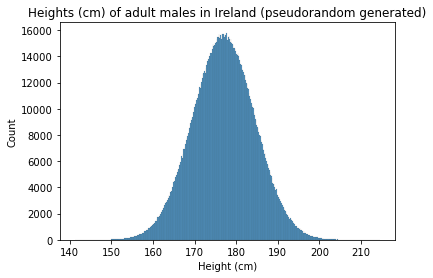

In [18]:
hist_plotting(irish_male_heights, 'Height (cm)', 'Count', "Heights (cm) of adult males in Ireland (pseudorandom generated)");

The histogram already resembles a bell curve. To make it even clearer, we can add a Kernel Density Estimate (kde) by changing the kde argument to True into the hist_plotting function. This will add a curved line over the histogram, and will highlight any bell curve.

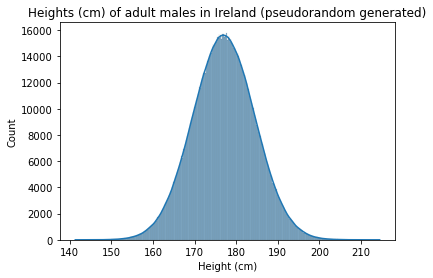

In [10]:
#Creating the same histogram, this time with a kernel density estimate included.
hist_plotting(irish_male_heights, 'Height (cm)', 'Count', "Heights (cm) of adult males in Ireland (pseudorandom generated)", kde=True);

The bell curve shape that we expected is present, but do we have 68% of the events within one standard deviation of the mean, 95% within two and 99.7% within three? I'll next highlight areas of the x axis to represent the standard deviations.

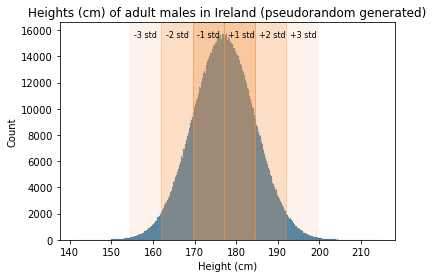

In [12]:
#Setting the output of hist_plotting to the variable "ax". This will allow for further customization to highlight standard deviations.
ax = hist_plotting(irish_male_heights, 'Height (cm)', 'Count', "Heights (cm) of adult males in Ireland (pseudorandom generated)");

#Highlighting the section between the mean, and the mean + 1 standard deviation
ax.axvspan(np.mean(irish_male_heights),(np.mean(irish_male_heights)+np.std(irish_male_heights)), color='#F49342', alpha =0.5)
ax.text(np.mean(irish_male_heights)+1,15500, "+1 std", color = 'black', ha='left',fontsize = 8)

#Highlighting the section between the mean, and the mean - 1 standard deviation
ax.axvspan(np.mean(irish_male_heights),(np.mean(irish_male_heights)-np.std(irish_male_heights)), color='#F49342', alpha =0.5)
ax.text(np.mean(irish_male_heights)-1,15500, "-1 std", color = 'black', ha='right', fontsize = 8)

#Highlighting the section between the mean, and the mean + 2 standard deviations
ax.axvspan(np.mean(irish_male_heights)+np.std(irish_male_heights),(np.mean(irish_male_heights)+(2*np.std(irish_male_heights))), color='#F49342', alpha =0.3)
ax.text(np.mean(irish_male_heights)+np.std(irish_male_heights)+1,15500, "+2 std", color = 'black', ha='left', fontsize = 8)

#Highlighting the section between the mean, and the mean - 2 standard deviations
ax.axvspan(np.mean(irish_male_heights)-np.std(irish_male_heights),(np.mean(irish_male_heights)-(2*np.std(irish_male_heights))), color='#F49342', alpha =0.3)
ax.text(np.mean(irish_male_heights)-np.std(irish_male_heights)-1,15500, "-2 std", color = 'black', ha='right', fontsize = 8);

#Highlighting the section between the mean, and the mean + 3 standard deviations
ax.axvspan(np.mean(irish_male_heights) + (2 * np.std(irish_male_heights)),(np.mean(irish_male_heights)+(3*np.std(irish_male_heights))), color='#F49342', alpha =0.1)
ax.text(np.mean(irish_male_heights) + (2 * np.std(irish_male_heights)) + 1, 15500, "+3 std", color = 'black', ha='left', fontsize = 8)

#Highlighting the section between the mean, and the mean - 3 standard deviations
ax.axvspan(np.mean(irish_male_heights)- (2 * np.std(irish_male_heights)),(np.mean(irish_male_heights)-(3*np.std(irish_male_heights))), color='#F49342', alpha =0.1)
ax.text(np.mean(irish_male_heights)-(2 * np.std(irish_male_heights))-1, 15500, "-3 std", color = 'black', ha='right', fontsize = 8);



We can now see that almost all of the events on either side of the mean are within three standard deviations, as we'd expect in a normal distribution. From this we can tell that:

* 68% of Ireland's adult male population are between roughly 169cm and 185cm tall.
* 95% are between roughly 162cm and 192 cm tall.
* 99.7% are between roughly 155cm and 200cm tall. 

We've seen that in just one line of code, we were able to create a sample of height measurements for the entire adult male population of Ireland.  Bearing in mind that this is all simulated data at this point, and could well be different to the real world, we can still make some inferences around this. For example, if I'm looking to start a menswear line, I have some estimate of what length of coats I might need in order to cater for the majority of the Irish adult male population.

<a id="uniform"></a>
### Uniform Distribution

The uniform probability distribution is another that we see often in the real world, whereby each of the available options has an equal probability of being selected. An everyday example of this is when we roll a fair six sided die as each of the six faces has a 1 in 6 chance of being rolled, with none receiving a bias. Another example is when we pick a card out of a deck. Picking a particular card out of a full shuffled deck has an equal 1 in 52 chance of being picked, or picking out a diamond card out of a deck has a 13 in 52 chance of being picked (also summarised as 1 in 4). 

It should be noted, that in smaller samples, it's possible that a particular result may appear more or less often than we expect, and so the probabilities may not look to be uniform. However, as the sample size increases, a truly uniform distribution will even out. 

#### The random.uniform function

We've already seen another Numpy.Random function that generates numbers based on a uniform distribution - the integers() function outlined in the Simple Random Data section of this notebook. One key difference between the integers() function and the uniform() function, is that while integers() generates integers (as you'd expect), uniform() will generate floating point numbers. It therefore replaces the random() function when the user requires numbers outside of the range of 0 and 1. Therefore if we are looking to create a discrete uniform distribution, such as simulating the rolling of a die, we'd want to use the integers() function. If the user wants to create a continuous uniform distribution, they can use the uniform() function.

Here we see the syntax is very similar, with just the "low", "high" and "size" arguments available[36]:

```
Generator.uniform(low=0.0, high=1.0, size=None)
```

We can see the difference between the integer() and uniform() functions below:

In [33]:
rng = np.random.default_rng(33)

#Generating a continuous uniform distribution via the uniform() function.
continuous = rng.uniform(1,7,10)

#Generating a discrete uniform distribution via the integers() function.
discrete = rng.integers(1,7,10)

print("Continuous:")
print(continuous)
print("\nDiscrete:")
print(discrete)

Continuous:
[3.66185342 4.41094715 6.44862265 2.52549732 4.53268762 3.15473992
 5.5382417  4.25835317 2.21250675 4.09663171]

Discrete:
[3 2 4 1 1 1 6 3 1 1]


#### Continuous example - measuring the time between breaths for healthy adults

For this example, I'm going to assume that the entire adult male population of Ireland are healthy, with vital signs that indicate no underlying health issues. This obviously would not be reflected in the real world, but can help show a continuous example of a uniform distribution.

According to the Cleveland Clinic, the normal respiration rate for an adult at rest is between 12 and 20 breaths per minute[37]. Therefore I will set 3 as the lower limit (60 seconds / 20 breaths) and 5 as the higher limit (60 seconds / 12 breaths), and will simulate measuring the time from one breath to the next across the Irish adult male population (via the irish_male_population variable stated previously).

In [14]:
rng = np.random.default_rng(33)

#Creating an uniformly distributed array of floating point numbers between 3 and 5.
ireland_breath = rng.uniform(3, 5, irish_male_population)

ireland_breath

array([3.88728447, 4.13698238, 4.81620755, ..., 4.64279304, 4.76217182,
       4.48989452])

As before, we can double check the number of observations generated, alongside the minimum and maximum values. In this case, as we specified a minimum of 3, and a maximum of 5, we'd expect these values to be as close as possible to them.

In [15]:
#Printing the number of observations contained within the array.
print("Number of male Irish adults measured:")
print(len(ireland_breath))

#Printing the smallest value in the array.
print("\nShortest time to breath measured:")
print(min(ireland_breath))

#Printing the largest value in the array.
print("\nLongest time to breath measured:")
print(max(ireland_breath))

Number of male Irish adults measured:
1745643

Shortest time to breath measured:
3.000001233543774

Longest time to breath measured:
4.999998156659682


Because our range is between 3 and 5, and every measurement has an equal chance of being recorded, we would expect the mean and median to to sit around the middle of this range - in this case around 4.

In [16]:
#Printing the mean value of the array.
print("The mean measurement is:")
print(np.mean(ireland_breath))

#Printing the median value of the array.
print("\nThe median measurement is:")
print(np.median(ireland_breath))

The mean measurement is:
3.9998228200314583

The median measurement is:
3.999759805633169


As each measurement has an equal probability of being measured, we should not see the bell curve shape that we saw on the normal distribution. In this case, we should be seeing a much flatter, more even distribution of the results.

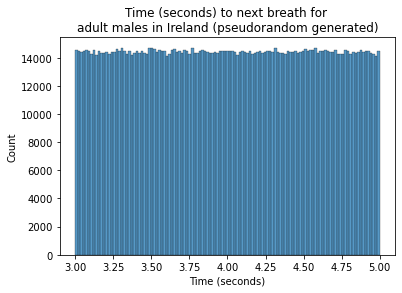

In [18]:
hist_plotting(ireland_breath, 'Time (seconds)', 'Count', "Time (seconds) to next breath for \nadult males in Ireland (pseudorandom generated)");

This plot matches up with what we'd expect from a uniform distribution. While some measurements occurred more often than others, the differences are minor, and so we can be confident that there was an equal probability for each measurement. In our discrete example, we'll see how smaller sample sizes can lead us astray.

#### Discrete example - rolling a fair 6 sided die

As rolling a die is an example of a discrete uniform probability, that is to say that each of the 6 values has an equal probability of being rolled and no decimal figures are possible, we will have to use the integers() function in this example. While it isn't the uniform() function being used here, they do both generate data for a uniform distribution as outlined in Numpy's documentation.

To begin with, let's roll a fair 6 sided die 30 times, and see how the results look.

In [19]:
rng = np.random.default_rng(33)

#Picking a number from 1-6 30 times, each with an equal probability of being selected.
roll_30 = rng.integers(1, 7, 30)

roll_30

array([6, 3, 3, 4, 5, 6, 2, 2, 4, 4, 2, 3, 6, 5, 6, 4, 3, 2, 5, 4, 3, 2,
       4, 1, 1, 1, 6, 3, 1, 1])

Since each outcome has an equal probability, we would expect each number to be rolled 5 times (30 rolls / 6 possible outcomes). However, the number 5 was only rolled 3 times within this sample. I'll plot this so that we can see this clearer.

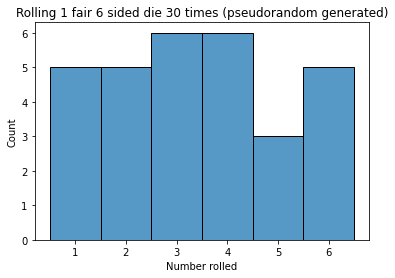

In [20]:
#As the values here are all discrete, I will set discrete=True. This will mean each integer will be a bin.
hist_plotting(roll_30, 'Number rolled', 'Count', "Rolling 1 fair 6 sided die 30 times (pseudorandom generated)", discrete = True);

Here we can see that numbers 3 and 4 were rolled 6 times each, however number 5 was only rolled 3 times. With such a small sample, one could be led into believing that there was some bias on the die to reduce the probability of 5 being rolled. However, probability is exactly what it says - its probability. With a sample of only 30 die rolls, it is possible that one number is rolled less than it's probability would suggest, or that another is rolled more. It's therefore risky to make any judgement based on such a small sample, and so in a situation like this, we should look to gather more data. For example, what happens if we ask every adult male in Ireland to roll a fair 6 sided die.

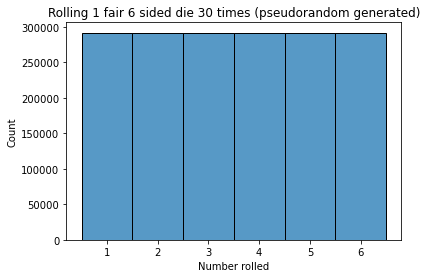

In [22]:
rng = np.random.default_rng(33)

#Generating a new array with a much larger number of observations.
roll_ireland = rng.integers(1, 7, irish_male_population)

#Passing this new array to the hist_plotting function so that we can see the results.
hist_plotting(roll_ireland, 'Number rolled', 'Count', "Rolling 1 fair 6 sided die 30 times (pseudorandom generated)", discrete = True);

With 1745643 adult males in Ireland, each rolling the die once, we'd expect each number to be rolled around 290,940 times, and that's roughly what we see here. Each of the 6 outcomes looks even to the human eye. If we take a look at the count for each of the outcomes, we'll see that they're not all exactly 290,940 (in fact none of them are), but they are all centered around that number.

In [23]:
#Getting the counts of each value in the array.
number, count = np.unique(roll_ireland, return_counts=True)
count

array([291140, 290699, 291512, 290630, 290465, 291197])

<a id="binomial"></a>
### Bernoulli and Binomial Distributions

The Bernoulli probability distribution only tracks binary outcomes, with 1 incidicating a "success", and 0 a "failure". It can therefore be used for scenarios such as flipping a coin, where 1 could mean landing on heads, and 0 on tails. Other scenarios include tracking the sales conversion on an online store, where 1 indicates a completed sale, and 0 an abandoned checkout.

The binomial distribution acts in much the same way, however whereas the Bernoulli distribution looks at the outcome of 1 trial, the binomial distribution takes in multiple repeats of that trial. For example, the outcome of flipping a coin once and recording 1 for heads or 0 for tails would be a Bernoulli variable, whereas the outcome of flipping a coin 10 times and summing the number of heads would be a binomial variable[38]. That said, each event (in this case the coin flips) is independent of each other, that is to say that flipping a heads this time has no influence on the outcome of the next coin flip, and vice versa.

It should also be noted, that while this coin flipping example involves two outcomes with equal probability (0.5 for heads and 0.5 for tails), this does not have to be the case for these two distributions. For example, an online store could have a conversion rate of 1% or less, but still be considered a bernoulli or binomial variable[28].

#### The random.binomial function

As these distributions only count the "successes" (1's in this case), the syntax for the function is very straightforward[39]:

```
Generator.binomial(n, p, size=None)
```

Here "n" is the number of actions in each trial. For example, if we're looking to flip a coin 10 times, we'd enter 10 here. It's also worthwhile noticing that Numpy.Random does not have a specific Bernoulli function, as the user can just set "n=1" to create a Bernoulli distribution via the binomial() function.

"p" is the probability of success, that is to say the probability of the outcome being 1. In the coin flipping example, this would be 0.5. In my store conversion example it would be 0.01 (for a 1% probability).

As we've seen before, size is the amount of events we want in our dataset. We must be careful not to confuse this with "n" though. For example:
```
Generator.binomial(n = 10, p = 0.5, size=50)
```

This would simulate 50 people flipping a coin 10 times each. That is a total of 500 coin flips, not 50.

#### Bernoulli example - How many sales can I anticipate from a given amount of traffic?

Operating a successful online business rests on two key data points: 
* How much traffic is the online store getting? 
* And what proportion are visitors converting into customers? 

There's clearly a lot that goes into determining these two data points, and a number of factors that can influence one or both, but the fact remains that you can't sell anything without traffic, and that traffic is useless if none convert into sales. Online businesses work tirelessly to improve their conversion rate through their pricing strategies, presentation or even streamlining the checkout process to reduce friction for the customer. They'll therefore be well aware of what percentage of visits are likely to create sales, and so can better judge how much they are willing to pay for any traffic to their website via advertisements, product placements and such.

For this example, let's imagine I am running an online store that sells a wonderful line of men's socks. I've been tweaking my website endlessly, and I now have a conversion rate of about 5%, and my socks sell for €5 a pair. It's now time to start my marketing campaign. I've been offered the chance to guarantee every adult male in Ireland will visit my website just once for the reasonable price of €500,000. 

€500,000 for 1745643 potential customers - sounds pretty good, right? Let's use the Bernoulli distribution to see how good a deal this really would be for my business.

In [6]:
#State our variables - a 5% conversion rate and €5 per pair of socks
conversion_rate = 0.05

socks_price = 5

#Now to generate the distribution
rng = np.random.default_rng(33)

socks_ireland = rng.binomial(1, conversion_rate, irish_male_population)

socks_ireland

array([0, 0, 0, ..., 0, 0, 0])

We can now plot the results, and see how the sales (1's) compare to the abandoned checkouts (0's).

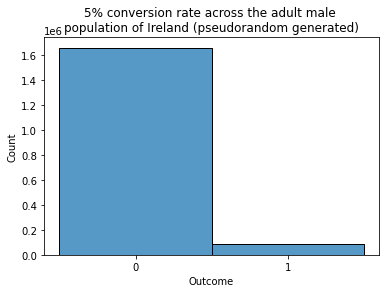

In [12]:
#Setting the hist_plotting function to the variable "ax" so that I can tidy up the x axis.
ax = hist_plotting(socks_ireland, 'Outcome', 'Count', "5% conversion rate across the adult male \npopulation of Ireland (pseudorandom generated)", discrete=True)

ax.set_xticks([0, 1]);

Here we can see over 1.6 million visitors didn't convert, as shown by the 0s. That said, we expected the amount of sales to be a good bit lower, but did we convert enough to make profit on our €500,000?

In [13]:
#Adding the cost of the marketing campaign as a variable.
cost = 500000

#Generating the revenue by summing the 1's in the array, and multiplying by the socks_price variable
revenue = sum(socks_ireland) * socks_price

#Subtracting the revenue from the cost to get the final total
total = revenue - cost
print("The final total for this campaign is €" + str(total) + ".")

The final total for this campaign is €-65595.


Oh dear, If I took up this opportunity, I would lose €65595. It's a good thing I was able to simulate this scenario then.

From here I can tweak my variables, and perhaps find a price and conversion rate that would bring sufficient profit for my business. At that point I can go into my decision with more confidence, while being aware that these are just probabilities, and in the real world many things could change the results (for example my website going down with all this traffic).

#### Binomial example - Flip 20 heads in a row to win a prize!

Now that we've seen how a Bernoulli distribution can help someone budget their online advertising costs, we can now turn to the binomial distribution. In this example, I am going to challenge every adult male in Ireland to flip heads on a fair balanced coin 20 times in a row. If they are successful, they will win a prize!

Flipping 20 heads in a row is incredibly unlikely, especially if you only have 1 attempt to do (you'd wish you had recorded it), but it's not impossible. Before I put my plan into practice, I can use a binomial distribution to give me an idea of how many winners I can expect to encounter.

In [14]:
#State our variables

heads_probability = 0.5

coin_flips = 20

#Now to generate the distribution
rng = np.random.default_rng(33)

#Generating a dataset of each adult male in Ireland flipping a coin 20 times, and recording the heads that landed.
flips_ireland = rng.binomial(coin_flips, heads_probability, irish_male_population)

flips_ireland

array([10, 10, 13, ..., 12, 13, 11])

Again, let's visualize the results.

<AxesSubplot:title={'center':'Number of heads flipped on 20 coin tosses by \nthe adult male population of Ireland (pseudorandom generated)'}, xlabel='Number of heads flipped', ylabel='Count'>

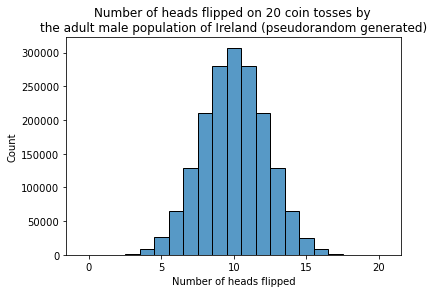

In [16]:
hist_plotting(flips_ireland, 'Number of heads flipped','Count', "Number of heads flipped on 20 coin tosses by \nthe adult male population of Ireland (pseudorandom generated)", discrete = True)

Interestingly, we've created the bell curve shape that we'd expect of a normal distribution, as the results center around the midpoint of 10. This isn't surprising as the coins were flipped 20 times, and the probability of landing on heads was 0.5.

We could now use the 68-95-99.7 rule of normal distributions to see the range of heads the majority of people flipped.

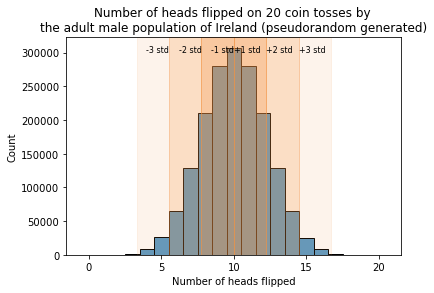

In [21]:
ax = hist_plotting(flips_ireland, 'Number of heads flipped','Count', "Number of heads flipped on 20 coin tosses by \nthe adult male population of Ireland (pseudorandom generated)", discrete = True);

#Highlighting the section between the mean, and the mean + 1 standard deviation
ax.axvspan(np.mean(flips_ireland),(np.mean(flips_ireland)+np.std(flips_ireland)), color='#F49342', alpha =0.5)
ax.text(np.mean(flips_ireland),300000, "+1 std", color = 'black', ha='left',fontsize = 8)

#Highlighting the section between the mean, and the mean - 1 standard deviation
ax.axvspan(np.mean(flips_ireland),(np.mean(flips_ireland)-np.std(flips_ireland)), color='#F49342', alpha =0.5)
ax.text(np.mean(flips_ireland),300000, "-1 std", color = 'black', ha='right', fontsize = 8)

#Highlighting the section between the mean, and the mean + 2 standard deviations
ax.axvspan(np.mean(flips_ireland)+np.std(flips_ireland),(np.mean(flips_ireland)+(2*np.std(flips_ireland))), color='#F49342', alpha =0.3)
ax.text(np.mean(flips_ireland)+np.std(flips_ireland),300000, "+2 std", color = 'black', ha='left', fontsize = 8)

#Highlighting the section between the mean, and the mean - 2 standard deviations
ax.axvspan(np.mean(flips_ireland)-np.std(flips_ireland),(np.mean(flips_ireland)-(2*np.std(flips_ireland))), color='#F49342', alpha =0.3)
ax.text(np.mean(flips_ireland)-np.std(flips_ireland),300000, "-2 std", color = 'black', ha='right', fontsize = 8);

#Highlighting the section between the mean, and the mean + 3 standard deviations
ax.axvspan(np.mean(flips_ireland) + (2 * np.std(flips_ireland)),(np.mean(flips_ireland)+(3*np.std(flips_ireland))), color='#F49342', alpha =0.1)
ax.text(np.mean(flips_ireland) + (2 * np.std(flips_ireland)), 300000, "+3 std", color = 'black', ha='left', fontsize = 8)

#Highlighting the section between the mean, and the mean - 3 standard deviations
ax.axvspan(np.mean(flips_ireland)- (2 * np.std(flips_ireland)),(np.mean(flips_ireland)-(3*np.std(flips_ireland))), color='#F49342', alpha =0.1)
ax.text(np.mean(flips_ireland)-(2 * np.std(flips_ireland)), 300000, "-3 std", color = 'black', ha='right', fontsize = 8);



Here we can see that 99.7% of our coin flippers got between 4 and 16 heads, 95% got between 6 and 14 heads, and 68% got between 8 and 12 heads.

The real question for our competition though, is did anyone get 20 heads in a row? We'll need to use a log scale to see the more extreme values on the histogram.

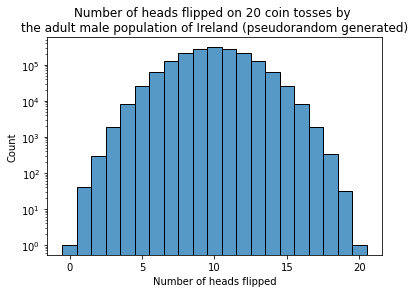

In [23]:
ax = hist_plotting(flips_ireland, 'Number of heads flipped','Count', "Number of heads flipped on 20 coin tosses by \nthe adult male population of Ireland (pseudorandom generated)", discrete = True);

#Setting the y axis to logarithmic scale so that we can see the extreme values more clearly.
ax.set_yscale("log")


With every adult male in Ireland flipping a coin 20 times, we've ended up with 1 lucky guy getting 20 heads in a row. I really hope he recorded that.

We also had one unfortunate soul get 20 tails in a row. Today was not their day.

<a id="geometric"></a>
### Geometric and Negative Binomial Distributions

While the Bernoulli and Binomial Distributions look at the probably successes from x trials (1 in the case of Bernoulli), the Geometric and Negative Binomial Distributions looks are how many trials until x successes. Similar to the relationship between Bernoulli and Binomial, the Geometric Distribution will estimate how many trials until 1 success, whereas the Negative Binomial Distribution will do the same but for multiple success.

For example, in the coin toss example above, we looked at how many heads someone would flip in 20 coin tosses - this was a binomial variable. If we were instead to look at how many coin tosses would it take for someone to flip 20 heads, regardless of whether or not they were in a row, this would be a negative binomial distribution. Likewise if we just wanted to see how many coin flips until 1 head, we can use the Geometric Distribution.

It should therefore come as no surprise to see that the syntax for these two distributions are very similar to that of the Binomai Distributions, even if the outputs are quite different[40][41]:

```
Generator.geometric(p, size=None)
Generator.negative_binomial(n, p, size=None)
```

The key difference here is that whereas for the binomial function "n" was the number of trials to be conducted, in the  case of the negative binomial the "n" is the number of successes we want to achieve. As the geometric only looks for 1 success, there is no "n" parameter.

These distributions help predict how many events have to take place before we get a certain amount of successes, and so can be used to predict how much of a particular action one must take before they meet their goal[42]. For example, if I need to sell 10,000 pairs of socks in order to make the minimum order from my supplier, and I know my website has a 5% conversion rate, how many visitors will I likely need in order to sell sufficient socks to make that minimum order (assuming 1 pair of socks per customer).

#### Geometric example - How many coin flips until 1 heads?

In the last Binomial Distribution example, we saw that just 1 of our 1745643 Irish men flipped heads 20 times, and so won the prize. However, we also saw the 1 poor soul didn't flip any heads in 20 coin flips, which had an equally low probability. 

If we wanted to see at what point someone was most likely to have flipped at least 1 heads, we can use the Geometric Distribution. In this case, I'll ask the men of Ireland to flip a coin again, and we'll simulate how many flips it took to get heads.

In [29]:
#State our variables

heads = 0.5

#Now to generate the distribution
rng = np.random.default_rng(33)

flipping_heads_ireland = rng.geometric(heads, irish_male_population)

flipping_heads_ireland
np.min(flipping_heads_ireland)

1

Now to plot this for easier exploration.

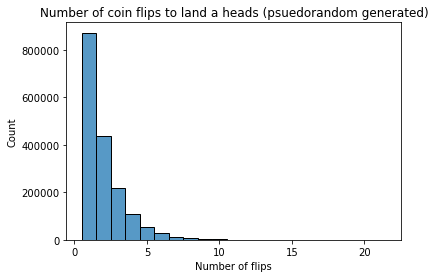

In [58]:
ax = sns.histplot(flipping_heads_ireland, discrete = True)
ax.set(xlabel='Number of flips', ylabel='Count')
ax.set_title("Number of coin flips to land a heads (pseudorandom generated)");

We can see that the majority of our coin flippers got their first heads within 3 flips, and nearly everone had a heads within 10 flips. However as those counts are so high, we can't see the most extreme the results with lower counts. As I'm curious to see if any of our coin flippers of Ireland flipped 20 tails in a row again, I'll use a logarithmic scale on the y axis. This will let us see some of the smaller counts a bit clearer.

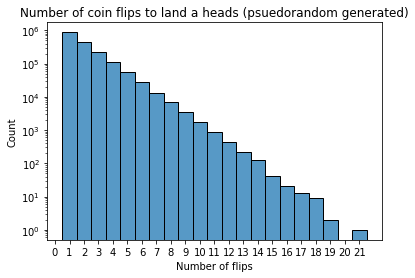

In [60]:
ax = sns.histplot(flipping_heads_ireland, discrete = True, log_scale = (False, True))
ax.set_xticks(range(22))
ax.set(xlabel='Number of flips', ylabel='Count')
ax.set_title("Number of coin flips to land a heads (pseudorandom generated)");

Sure enough, one of our gentlemen in this simulation required 21 coin flips to get their first heads.

Flipping a coin rarely has major implications for anyone, so this example is trivial, however it is possible to see how the Geometric Distribution can apply to other aspects of life where the results are more impactful. We'll see such as example with the Negative Binomial Distribution, which will simuluate how many trials until we hit multiple successes, rather than stopping at the 1 success that the Geometric Distribution does. 

#### Negative Binomial Example - How many visitors will I need in order to sell 10,000 socks?

Let's revist the example from the introduction to Geometric and Negative Binomial Distributions. 

I want to see how many visitors do I need to get to my website in order to sell 10,000 pairs of socks, assuming a 5% conversion rate and 1 pair of socks per order. As I want to be very confident in the results, I'll run this 10000 times.


In [13]:
#State the number of successes we need
minimum_orders = 10000

rng = np.random.default_rng(33)

socks_ordered = rng.negative_binomial(minimum_orders, 0.05, 10000)

socks_ordered

array([191446, 187362, 193159, ..., 187545, 189428, 186246])

Once again, let's plot this to see what the results are.

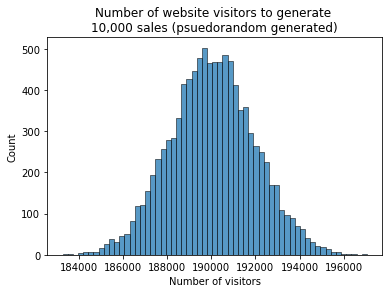

In [14]:
ax = sns.histplot(socks_ordered)
ax.set(xlabel='Number of visitors', ylabel='Count')
ax.set_title("Number of website visitors to generate \n10,000 sales (pseudorandom generated)");

Again this looks like a Normal Distribution. We can double check this by seeing what the mean and median is, and seeing if that's where the peak of our bell curve is appearing.

In [53]:
print("The mean visitors required are:")
print(np.mean(socks_ordered))
print("\nThe median visitors required are:")
print(np.median(socks_ordered))

The mean visitors required are:
190032.2786

The median visits required are:
190016.5


This is looking more and more like a normal distribution. We know that normal distributions should have 95% of their results within 2 standard deviations either side of the mean. In this case I must ensure I get at least 10,000 pairs of socks sold, so I can look at two standard deviations above the mean to see what number of visitors I should be aiming for to have 95% confidence in hitting my order.


The standard deviation for visitors required is:
1926.8782622111964


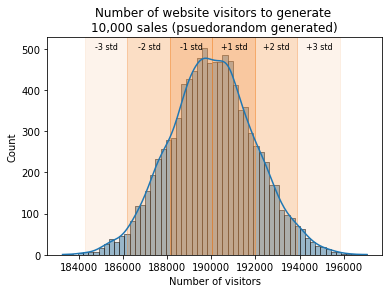

In [82]:
print("\nThe standard deviation for visitors required is:")
print(np.std(socks_ordered))

ax = sns.histplot(socks_ordered, kde=True)
ax.set(xlabel='Number of visitors', ylabel='Count')
ax.set_title("Number of website visitors to generate \n10,000 sales (pseudorandom generated)")

# Highlighting the section between the mean, and the mean + 1 standard deviation
ax.axvspan(np.mean(socks_ordered),(np.mean(socks_ordered)+np.std(socks_ordered)), color='#F49342', alpha =0.5)
ax.text(np.mean(socks_ordered)+400,500, "+1 std", color = 'black', ha='left',fontsize = 8)

# Highlighting the section between the mean, and the mean - 1 standard deviation
ax.axvspan(np.mean(socks_ordered),(np.mean(socks_ordered)-np.std(socks_ordered)), color='#F49342', alpha =0.5)
ax.text(np.mean(socks_ordered)-400,500, "-1 std", color = 'black', ha='right', fontsize = 8)

# Highlighting the section between the mean, and the mean + 2 standard deviations
ax.axvspan(np.mean(socks_ordered)+np.std(socks_ordered),(np.mean(socks_ordered)+(2*np.std(socks_ordered))), color='#F49342', alpha =0.3)
ax.text(np.mean(socks_ordered)+np.std(socks_ordered)+400,500, "+2 std", color = 'black', ha='left', fontsize = 8)

# Highlighting the section between the mean, and the mean - 2 standard deviations
ax.axvspan(np.mean(socks_ordered)-np.std(socks_ordered),(np.mean(socks_ordered)-(2*np.std(socks_ordered))), color='#F49342', alpha =0.3)
ax.text(np.mean(socks_ordered)-np.std(socks_ordered)-400,500, "-2 std", color = 'black', ha='right', fontsize = 8);

# Highlighting the section between the mean, and the mean + 3 standard deviations
ax.axvspan(np.mean(socks_ordered) + (2 * np.std(socks_ordered)),(np.mean(socks_ordered)+(3*np.std(socks_ordered))), color='#F49342', alpha =0.1)
ax.text(np.mean(socks_ordered) + (2 * np.std(socks_ordered)) + 400, 500, "+3 std", color = 'black', ha='left', fontsize = 8)

# Highlighting the section between the mean, and the mean - 3 standard deviations
ax.axvspan(np.mean(socks_ordered)- (2 * np.std(socks_ordered)),(np.mean(socks_ordered)-(3*np.std(socks_ordered))), color='#F49342', alpha =0.1)
ax.text(np.mean(socks_ordered)-(2 * np.std(socks_ordered))-400, 500, "-3 std", color = 'black', ha='right', fontsize = 8);



In [85]:
print("The upper target to give me 95% probability of getting at least 10,000 orders is:")
print(np.mean(socks_ordered)+(2*np.std(socks_ordered)))

print("The upper target to give me 99.7% probability of getting at least 10,000 orders is:")
print(np.mean(socks_ordered)+(3*np.std(socks_ordered)))

The upper target to give me 95% probability of getting at least 10,000 orders is:
193886.03512442237
The upper target to give me 99.7% probability of getting at least 10,000 orders is:
195812.9133866336


So by generating a Negative Binomial Distribution, then recognising the results resembled a Normal Distribution and remembering the characteristics of a Normal Distribution, I've been able to estimate that if I get at least 193886 visitors it'll give me the minimum orders I need 95% of the time. This gives me a great target to aim for, and had I used napkin math to calculate this, I would've likely landed on 200,000 as being the minimum (5% conversion rate, and 10,000 conversion require would suggested 200,000 visitors required at least). Those 6114 less required visitors will not only make my target that little bit more achievable, it might even save me much needed advertising costs.

Even if I were to aim for 99.7% probability, thus requiring 195813 visitors (rounded to the nearest integer), that is still 4187 less visitors then napkin math would have suggestion, and could represent crucial savings for my business.

<a id="references"></a>
# References 

* [1] Harris, C.R., Millman, K.J., van der Walt, S.J. et al. Array programming with NumPy. Nature 585, 357–362 (2020), available from: https://doi.org/10.1038/s41586-020-2649-2 [accessed 20 November 2020]
* [2] Pandas, 2020 [online], available from: https://pandas.pydata.org/pandas-docs/stable/getting_started/overview.html [accessed 20 November 2020]
* [3] Stack Overflow; Differences between numpy.random and random.random in Python; https://stackoverflow.com/a/43838531 [accessed 20 November 2020]
* [4] Numpy, 2020 [online], available from:
https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice [accessed 20 November 2020]
* [5] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle [accessed 20 November 2020]
* [6] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation [accessed 20 November 2020]
* [7] Frost, J., 2018, Introduction to Bootstrapping in Statistics with an Example [online]; available from: https://statisticsbyjim.com/hypothesis-testing/bootstrapping/ [accessed 20 November 2020]
* [8] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/index.html [accessed 20 November 2020]
* [9] Numpy, 2020 [online], available from:  https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64 [accessed 20 November 2020]
* [10] Rubin, J., M., 2011, Can a computer generate a truly random number? [online], available from: https://engineering.mit.edu/engage/ask-an-engineer/can-a-computer-generate-a-truly-random-number/ [accessed 20 November 2020]
* [11] Pierre L’Ecuyer, Richard Simard, TestU01: A C Library for Empirical Testing of
Random Number Generators, ACM Transactions on Mathematical Software, Vol. 33, No. 4, Article 22, August 2007, available from: https://www.iro.umontreal.ca/~lecuyer/myftp/papers/testu01.pdf [accessed 20 November 2020]
* [12] Melissa E. O’Neill, PCG: A Family of Simple Fast Space-Efficient Statistically Good Algorithms for Random Number Generation, September 5, 2014, available from: https://www.cs.hmc.edu/tr/hmc-cs-2014-0905.pdf [accessed 20 November 2020]
* [13] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/bit_generators/index.html#seeding-and-entropy [accessed 20 November 2020]
* [14] Williams, E., 2017, WHAT IS ENTROPY AND HOW DO I GET MORE OF IT? [online], available from: https://hackaday.com/2017/11/02/what-is-entropy-and-how-do-i-get-more-of-it/ [accessed 20 November 2020]
* [15] Ebner, J., 2019, NUMPY RANDOM SEED EXPLAINED [online], available from: https://www.sharpsightlabs.com/blog/numpy-random-seed/ [accessed 20 November 2020]
* [16] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/parallel.html#seedsequence-spawn [accessed 20 November 2020]
* [17] Scipy, 2020 [online], available from: https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.seed.html [accessed 20 November 2020] 
* [18] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generator.html#numpy.random.default_rng [accessed 20 November 2020] 
* [19] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers [accessed 20 November 2020]
* [20] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random [accessed 20 November 2020]
* [21] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes [accessed 20 November 2020]
* [22] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice [accessed 20 November 2020]
* [23] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation [accessed 20 November 2020] 
* [24] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle [accessed 20 November 2020]
* [25] Ippolito, P., P., 2019, Probability Distributions in Data Science [online], available from: https://towardsdatascience.com/probability-distributions-in-data-science-cce6e64873a7
* [26] Wikipedia; Carl Friedrich Gauss; https://en.wikipedia.org/wiki/Carl_Friedrich_Gauss [accessed 20 November 2020] 
* [27] Stat Trek, [online], available from: https://stattrek.com/probability-distributions/discrete-continuous.aspx [accessed 20 November 2020]
* [28] Peter Bruce, Andrew Bruce, Peter Gedeck, Practical Statistics for Data Scientists, 2nd Edition, O'Reilly Media, Inc., May 2020
* [29] McColl, L., Regression to the Mean: as relevant today as it was in the 1900s [online], avaiable from: 
; https://select-statistics.co.uk/blog/regression-to-the-mean-as-relevant-today-as-it-was-in-the-1900s/ [accessed 20 November 2020]
* [30] Citizens Information, 2020 [online], available from: https://www.citizensinformation.ie/en/birth_family_relationships/children_s_rights_and_policy/children_and_rights_in_ireland.html#:~:text=However%2C%20you%20must%20be%2018%20years%20of%20age%20or%20over [accessed 20 November 2020]
* [31] Central Statistics Office, 2020 [online], available from: https://www.cso.ie/en/ [accessed 20 November 2020] 
* [32] Irish Universities Nutrition Alliance, 2011, NATIONAL ADULT
NUTRITION SURVEY [online], available from: https://irp-cdn.multiscreensite.com/46a7ad27/files/uploaded/The%20National%20Adult%20Nutrition%20Survey%20Summary%20Report%20March%202011.pdf [accessed 20 November 2020] 
* [33] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html [accessed 20 November 2020]
* [34] Roser, M., Appel, C., Ritchie, H., 2019, Human Height [online], available from: https://ourworldindata.org/human-height [accessed 20 November 2020] 
* [35] Seaborn, 2020 [online], available from: https://seaborn.pydata.org/generated/seaborn.histplot.html [accessed 20 November 2020]
* [36] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform [accessed 20 November 2020]
* [37] Cleveland Clinic, 2019 [online], available from: https://my.clevelandclinic.org/health/articles/10881-vital-signs [accessed 20 November 2020]
* [38] Alto, V., 2019, Understanding Bernoulli and Binomial Distributions [online], available from: https://towardsdatascience.com/understanding-bernoulli-and-binomial-distributions-a1eef4e0da8f [accessed 20 November 2020]
* [39] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html [accessed 20 November 2020]
* [40] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.negative_binomial.html#numpy.random.Generator.negative_binomial [accessed 20 November 2020]
* [41] Numpy, 2020 [online], available from: https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.geometric.html#numpy.random.Generator.geometric [accessed 20 November 2020]
* [42] Agarwal, R., 2019, The 5 discrete distributions every Data Scientist should know [online], available from:  https://towardsdatascience.com/the-five-discrete-distributions-every-statistician-should-know-131400f77782 [accessed 20 November 2020]
